# Estatística & Probabilidade - 2024/01

## Projeto 03 - Uma introdução ao aprendizado de máquina

### Hugo Tremonte de Carvalho

#### hugo@dme.ufrj.br

ALUNOS:

-Ana Beatriz de Azevedo Rodrigues - DRE:120044075

-Paulo Cesar Lima Santos da Silva - DRE:118145548

# -- INSTRUÇÕES -- LEIAM ATENTAMENTE! --

* A data limite de entrega da avaliação é domingo 14/07/2024 às 23h59, prazo improrrogável. Avaliações entregues após esse prazo serão desconsideradas.

* A entrega deve ser feita exclusivamente através do Google Classroom, usando a linguagem Python dentro de um notebook do Google Colaboratory, a ser anexado na atividade da seguinte forma:
  - Dentro da turma no Google Classroom, clique em "Atividades"
            
  - No tema "Projetos", clique em "Projeto 03" e em seguida em "Ver atividade"
            
  - No canto superior direito, clique em "+ Adicionar ou criar" e em seguida selecione em "Arquivo" ou "Google Drive", se optar fazer upload do notebook ou selecionar um arquivo de seu Google Drive, respectivamente.
            
  - O título do notebook deverá ser, obrigatoriamente, "SEU NOME - Projeto 03".
            
  - Para entregar o projeto, abra a atividade que o contém (conforme procedimento explicado no ponto acima), e no canto superior direito clique em "ENTREGAR" (o texto estará em uma caixa cinza, mas ele é clicável).
            
  - Na tela a seguir clique em "Entregar" para confirmar a entrega do trabalho.
            
  - Se você se arrependeu e quiser fazer outra entrega, basta abrir a atividade, no canto superior direito clique em "Cancelar envio" e confirme clicando novamente em "Cancelar envio" na janela que irá abrir. Você pode fazer isso quantas vezes quiser até o prazo determinado.
            
  - As explicações que você precisará fazer devem ser feitas em células de texto em seu notebook. Somente comentários pequenos devem ser feitos no código.
            
  - Caso seja necessário, equações podem ser introduzidas em $\LaTeX$ nas células de texto.
            
  - Figuras também podem ser incluídas em células de texto, tanto através de upload quanto simplesmente arrastando-a para alguma célula de texto. Nesse caso, sempre informe a fonte de onde a figura foi retirada, caso não tenha sido gerada por você.

* O projeto poderá ser feito **até** em dupla: quem quer fazer sozinho/a faz, mas quem quiser fazer em dupla também tem esse direito. Porém, vamos evitar problemas de "eu fiz tudo e ele/a não fez nada"! Infelizmente não tenho como controlar isso, e após o projeto entregue não adianta "eu fiz tudo sozinho/a", pois eu não estava lá para ver! Tentem se resolver entre si, mas em último caso posso auxiliar com uma mediação.

* No caso de trabalho em dupla, apenas **uma** pessoa da dupla deverá fazer o envio do trabalho, claro, deixando explícito quem é o/a parceiro/a.

* A troca de conhecimento na realização da avaliação é permitida e encorajada: ciência se faz com colaboração, e devemos seguir esse espírito aqui. Porém, cada dupla (ou indivíduo) deverá ter a sua própria resolução, e cópias ou outras ilegalidades serão severamente punidas com a anulação da avaliação para o(s) aluno(s) suspeito(s).

* Todos os passos de sua resolução devem ser devidamente justificados.

* Ao entregar essa avaliação, você afirma ter lido e estar de acordo com essas regras, comprometendo-se a cumpri-las.

O objetivo desta atividade é lhes introduzir a alguns aspectos de aprendizagem de máquina, tanto teóricos quanto práticos. Primeiramente, vamos introduzir um pouco de teoria e terminologia.

# Introdução

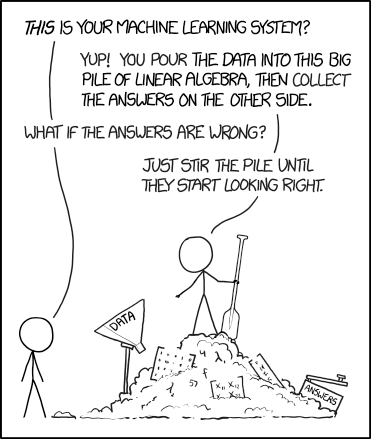

Retirado de https://xkcd.com/1838/

* **Estatística**: "Disciplina que trata da coleta, organização, análise, interpretação e apresentação de dados". [Fonte: Wikipedia]

* **Aprendizado estatístico/*Machine Learning***: Conjunto de ferramentas e modelos para entender dados, com especial atenção a aspectos de eficiência computacional. [Fonte: Wikipedia + vozes da minha cabeça]

* Métodos tradicionais de Estatística não são mais capazes de lidar com volumes de dados disponíveis atualmente

* Dados complexos: um bom entendimento sobre a aplicação não é somente importante mas crucial, em particular, para a elaboração de novas metodologias

* Em particular, metodologias e algoritmos podem ser fortemente dependentes da aplicação

Mudança de paradigma

* Estatística do Séc. XX:
   - Resultados assintóticos
   - $n \gg p$, onde $n$ é o número de observações e $p$ é o número de covariáveis

- Aplicações modernas:
   * $p \approx n$ ou $p \gg n$ -- ou seja, potencialmente mais coisas para se estimar do que se observa!
   * Resultados assintóticos não se aplicam mais

Duas culturas:
- Modelagem dos dados: criação e validação de um modelo para os dados observados. Foco em inferência
- Modelagem algorítmica: criação de bons algoritmos para prever novas instâncias observadas. Muitas vezes não lança mão de modelo probabilístico algum para os dados

$\Rightarrow$ "Nem melhor nem pior, apenas diferentes!"

Duas grandes áreas:

- Aprendizado supervisionado: modelos para aprender uma relação entre uma entrada e uma saída com base em um conjunto de exemplos ◄
- Aprendizado não-supervisionado: algoritmos que aprendem padrões e estruturas subjacentes em dados não-anotados

Dois principais tipos de problemas:

- Regressão: variável de saída é quantitativa
- Classificação: variável de saída é categórica ◄

## Classificação supervisionada sob a ótica da modelagem dos dados

- $\mathbf{X}$ vetor aleatório em $\mathbb{R}^p$ - *preditores* ou *atributos* (*features*)
- $\mathcal{C}$ conjunto finito - *rótulos*
- $Y$ variável aleatória em $\mathcal{C}$ finito

- Distribuição de probabilidade conjunta para $(\mathbf{X}, Y)$
- Observações $(\mathbf{X}_1, Y_1), \dots, (\mathbf{X}_n, Y_n), \dots \sim (\mathbf{X}, Y)$ iid
- Problema de **predição**: A partir de observações $(\mathbf{x}_i, y_i)_{i = 1, \dots, n}$ encontrar $g: \mathbb{R}^p \to \mathcal{C}$ (dito o *classificador*) tal que $$``g(\mathbf{x}_{n + 1}) \approx y_{n + 1}, \dots, g(\mathbf{x}_{n + m}) \approx y_{n + m}"$$

- Como formular tal pergunta sem aspas?
- Como encontrar tal $g$?

- *Risco esperado* associado à $g$: $$R(g) = \mathbb{E}[\underbrace{(Y - g(\mathbf{X}))^2}_{L(g; (\mathbf{X}, Y))}]$$
- "Basta" encontrar $g$ que minimiza tal quantidade! :-)

Mas nem tudo são flores...
- Tal procedimento é impossível... requer conhecimento completo do modelo probabilístico que relaciona $\mathbf{X}$ com $Y$!
- Além disso, a *perda quadrática* $L(g; (\mathbf{X}, Y)) = (Y - g(\mathbf{X}))^2$ não faz sentido no problema de classificação!

$$``g(\mathbf{x}_{i}) \approx y_{i}"$$

$$g(\mathbf{x}_{i}) = y_{i} \implies \text{:-)} \\ g(\mathbf{x}_{i}) \neq y_{i} \implies \text{:-(}$$

Uma função perda razoável parece ser $$L(g; (\mathbf{X}, Y)) = \mathbb{I}(Y \neq g(\mathbf{X})),$$ que vale $0$ se $Y = g(\mathbf{X})$ ou $1$ se $Y \neq g(\mathbf{X})$. Sua respectiva função risco é dada por $$R(g) = \mathbb{E}[\mathbb{I}(Y \neq g(\mathbf{X}))] = \mathbb{P}(Y \neq g(\mathbf{X})).$$

Qual classificador $g$ minimiza tal probabilidade?

### O classificador de Bayes

*Teorema*: A função $g: \mathbb{R}^p \to \mathcal{C}$ que minimiza o risco $$R(g) = \mathbb{E}[\mathbb{I}(Y \neq g(\mathbf{X}))] = \mathbb{P}(Y \neq g(\mathbf{X}))$$ é o *classificador de Bayes*, dado por $$g(\mathbf{x}) = \mathop{\mathrm{argmax}}_{d \in \mathcal{C}} \mathbb{P}(Y = d | \mathbf{X} = \mathbf{x})$$


- Classificamos $\mathbf{x}$ com a classe que possui a maior probabilidade *a posteriori*
- Porém, $\mathbb{P}(Y = d | \mathbf{X} = \mathbf{x})$ é em geral desconhecida

- Estimar $\mathbb{P}(Y = d | \mathbf{X} = \mathbf{x})$ para cada classe $d \in \mathcal{C}$
- Considerar o classificador $$\widetilde{g}(\mathbf{x}) = \mathop{\mathrm{argmax}}_{d \in \mathcal{C}} \widehat{\mathbb{P}}(Y = d | \mathbf{X} = \mathbf{x})$$

### Classificador de Bayes ingênuo

#### Formulação matemática - atributos contínuos

- $\mathbf{X} \in \mathbb{R}^p$ vetor de atributos - vetor aleatório contínuo
- Sendo $\mathbf{X}$ contínuo com densidade $q(\mathbf{x})$, temos que: $$\mathbb{P}(Y = d | \mathbf{X} = \mathbf{x}) = \frac{q(\mathbf{x} | Y = d)\mathbb{P}(Y = d)}{\sum_{c \in \mathcal{C}} q(\mathbf{x} | Y = c)\mathbb{P}(Y = c)} ~~~~ \mathrm{[\textit{Bayes...}]}$$
- $\mathbb{P}(Y = d)$ estimado através da proporção amostral entre as classes
- Assumir algum modelo probabilístico em $\mathbf{X}$ para estimar $q(\mathbf{x} | Y = d)$
- $\mathrm{[\textit{...ingênuo}]}$ Para toda classe $d \in \mathcal{C}$, fatoramos $$q(\mathbf{x} | Y = d) = q(x_1, \dots, x_p | Y = d) = \prod_{j = 1}^{p} q(x_j | Y = d)$$
- *Condicionalmente à classe* $Y$, as componentes de $\mathbf{X}$ são independentes

#### Formulação matemática - atributos discretos

- $\mathbf{X} \in \mathbb{R}^p$ vetor de atributos - vetor aleatório discreto
- Sendo $\mathbf{X}$ discreto, temos que: $$\mathbb{P}(Y = d | \mathbf{X} = \mathbf{x}) = \frac{\mathbb{P}(\mathbf{X} = \mathbf{x} | Y = d)\mathbb{P}(Y = d)}{\sum_{c \in \mathcal{C}} \mathbb{P}(\mathbf{X} = \mathbf{x} | Y = c)\mathbb{P}(Y = c)} ~~~~ \mathrm{[\textit{Bayes...}]}$$
- $\mathbb{P}(Y = d)$ estimado através da proporção amostral entre as classes
- Assumir algum modelo probabilístico em $\mathbf{X}$ para estimar $\mathbb{P}(\mathbf{X} = \mathbf{x} | Y = d)$
- $\mathrm{[\textit{...ingênuo}]}$ Para toda classe $d \in \mathcal{C}$, fatoramos $$\mathbb{P}(\mathbf{X} = \mathbf{x} | Y = d) = \mathbb{P}(X_1 = x_1, \dots, X_p = x_p | Y = d)$$ $$= \prod_{j = 1}^{p} \mathbb{P}(X_j = x_j | Y = d)$$
- *Condicionalmente à classe* $Y$, as componentes de $\mathbf{X}$ são independentes

### Classificador de Bayes ingênuo gaussiano

- $p$ atributos
- $n$ observações de cada


- Dados observados: $X$ matriz $n \times p$
- Cada linha: uma realização do vetor aleatório **contínuo** $\mathbf{X} \in \mathbb{R}^{p}$

- Variável resposta $Y \in \mathcal{C}$ - $n$ observações

- Como $\mathbf{X}$ é contínuo, temos que:


$$\mathbb{P}(Y = d | \mathbf{X} = \mathbf{x}) = \frac{q(\mathbf{X} = \mathbf{x} | Y = d)\mathbb{P}(Y = d)}{\sum_{c \in \mathcal{C}} q(\mathbf{X} = \mathbf{x} | Y = c)\mathbb{P}(Y = c)} \propto q(\mathbf{X} = \mathbf{x} | Y = d)\mathbb{P}(Y = d)$$

- $\mathbb{P}(Y = d)$ estimado através da proporção amostral entre as classes

- Assumir algum modelo probabilístico em $\mathbf{X}$ para estimar $q(\mathbf{X} = \mathbf{x} | Y = d)$, para $d \in \mathcal{C}$

- Hipótese ingênua: *condicionado à classe, as componentes de $\mathbf{X}$ são independentes*

- Matematicamente: *para toda classe $d \in \mathcal{C}$, fatoramos* $$q(\mathbf{X} = \mathbf{x} | Y = d) = q(X_1 = x_1, \dots, X_p = x_p | Y = d) = \prod_{j = 1}^{p} q(X_j = x_j | Y = d)$$


- $X_j | Y = d \sim \text{N}(\mu_{dj}, \sigma_{dj}^2)$

### Classificador de Bayes ingênuo Bernoulli

- $p$ atributos
- $n$ observações de cada


- Dados observados: $X$ matriz $n \times p$
- Cada linha: uma realização do vetor aleatório **discreto** $\mathbf{X} \in \mathbb{R}^{p}$

- Variável resposta $Y \in \mathcal{C}$ - $n$ observações

- Como $\mathbf{X}$ é discreto, temos que:


$$\mathbb{P}(Y = d | \mathbf{X} = \mathbf{x}) = \frac{\mathbb{P}(\mathbf{X} = \mathbf{x} | Y = d)\mathbb{P}(Y = d)}{\sum_{c \in \mathcal{C}} q(\mathbf{X} = \mathbf{x} | Y = c)\mathbb{P}(Y = c)} \propto \mathbb{P}(\mathbf{X} = \mathbf{x} | Y = d)\mathbb{P}(Y = d)$$

- $\mathbb{P}(Y = d)$ estimado através da proporção amostral entre as classes

- Assumir algum modelo probabilístico em $\mathbf{X}$ para estimar $\mathbb{P}(\mathbf{X} = \mathbf{x} | Y = d)$, para $d \in \mathcal{C}$

- Hipótese ingênua: *condicionado à classe, as componentes de $\mathbf{X}$ são independentes*

- Matematicamente: *para toda classe $d \in \mathcal{C}$, fatoramos* $$\mathbb{P}(\mathbf{X} = \mathbf{x} | Y = d) = \mathbb{P}(X_1 = x_1, \dots, X_p = x_p | Y = d) = \prod_{j = 1}^{p} \mathbb{P}(X_j = x_j | Y = d)$$


- $X_j | Y = d \sim \text{Bern}(p_{dj})$

# O projeto

O objetivo do projeto é trabalhar com a base de dados MNIST ("*Modified National Institute of Standards and Technology*"). Tal base consiste de 70.000 imagens de tamanho 28 x 28, em tons de cinza, contendo dígitos manuscritos, e o principal objetivo com ela é identificar qual é o dígito em questão. Algoritmos extremamente sofisticados (e pesadíssimos!) chegam a atingir uma taxa de erro de 0,17%, mas aqui vamos trabalhar com um algoritmo bem mais simples, o classificador de Bayes ingênuo Gaussiano, introduzido acima. Para tal, vamos usar o pacote `scikit-learn` (https://scikit-learn.org/stable/), que implementa diversos algoritmos de aprendizado de máquina de forma muito eficiente e de fácil uso. Abaixo seguem alguns códigos para melhor guiá-los, e no meio há instruções para o que deve ser feito no projeto.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## A base de dados

Primeiramente, vamos carregar e fazer uma análise preliminar na base de dados. Vamos baixar a base e ver o DataFrame que a contém:

In [3]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
print(X.shape)
display(X)

(70000, 784)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Vejamos agora o vetor `y`, bem como o seu tamanho:

In [5]:
print(y.shape)
display(y)

(70000,)


0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

Como podemos ver acima, `X` é um *dataframe* de 70.000 linhas e 784 colunas, e `y` é um *array* de tamanho 70.000, contendo o número referente a cada linha de `X`. Portanto, cada linha de `X` representa uma imagem de um dígito manuscrito. Vejamos alguns exemplos:

In [6]:
# FONTE: https://www.kaggle.com/code/soham1024/basic-neural-network-from-scratch-in-python

def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(12, 12))
    index = 1
    for x in zip(images, title_texts):
        image = x[0].reshape(28, 28)
        title_text = x[1]
        plt.subplot(rows, cols, index)
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);
        index += 1

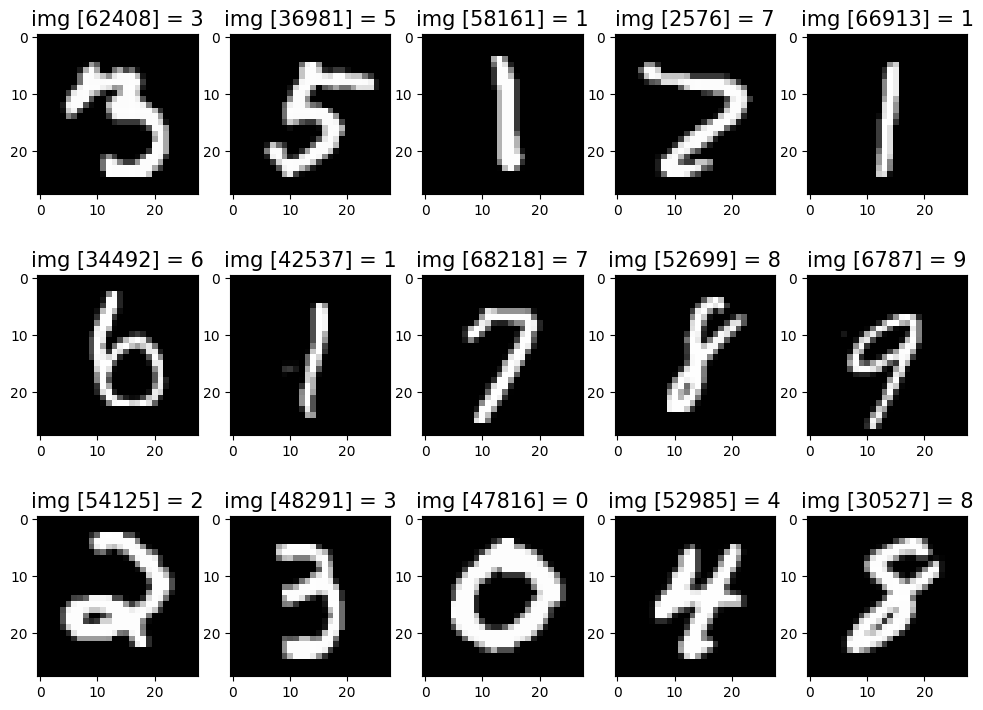

In [7]:
random_images = []
for i in range(0, 15):
    r = np.random.randint(1, 70000)
    random_images.append((X.values[r], 'img [' + str(r) + '] = ' + str(y[r])))

show_images(list(map(lambda x: x[0], random_images)), list(map(lambda x: x[1], random_images)))

Acima, nós vimos como são algumas das linhas de `X` pensadas como uma imagem de tamanho 28 x 28. Agora, vamos estudar a sua estrutura como um vetor de tamanho 784.

Dígito: 9


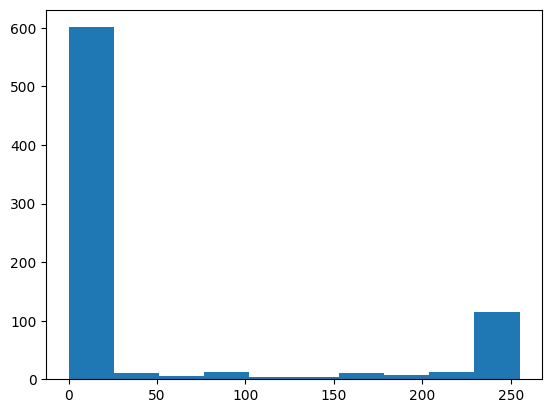

In [8]:
r = np.random.randint(1, 70000)
plt.hist(X.values[r])
print('Dígito:', y[r])
plt.show()

Portanto, do ponto de vista estatístico, cada linha do *dataframe* `X` consiste de 784 observações de variáveis aleatórias que tomam seus valores entre 0 e 255 e concentram-se principalmente em torno de tais valores. Essa é exatamente a estrutura de uma imagem em tons de cinza: o valor igual a 0 representa um *pixel* totalmente preto e um valor igual a 255 representa um *pixel* totalmente branco. Recomendo rodar diversas vezes o bloco acima, para verificar como varia o histograma dos tons de cinza. Nosso objetivo será tentar identificar qual dígito está sendo representado por determinado vetor de tamanho 784 (cujas componentes chamaremos de *atributos*), utilizando os classificadores de Bayes ingênuo gaussiano e Bernoulli que discutimos acima.

Para melhorar a magnitude de nossos dados, iremos fazer uma espécie de normalização, dividindo todos os valores de `X` por 255, para que tenhamos sempre valores entre 0 e 1.

ATENÇÃO! Se você rodar a célula abaixo mais de uma vez, vai estar "comprimindo" ainda mais os valores de X! Recomendo não fazer isso!

In [9]:
X = X/255

**QUESTÃO 1:** Os classificadores de Bayes ingênuo gaussiano e Bernoulli têm duas hipóteses: condicionado na classe, os atributos são (1) independentes e (2) descritos por distribuições normais (com parâmetros desconhecidos) ou Bernoulli (com parâmetro desconhecido). "Traduza" o que isso significa na linguagem do problema em questão (quais são nossos atributos? nossas classes? etc...), e discorra sobre a razoabilidade de tais hipóteses em nosso cenário.

*BÔNUS*: Apresente uma análise exploratória para justificar as suas conclusões.

Abaixo segue um breve *spoiler* da análise exploratória.

Montando e exibindo a matriz de correlação dos *pixels*, condicionado em um dígito específico:

In [10]:
dig = 5
corr_dig = (X[y == str(dig)] + np.random.normal(loc = 0, scale = 0.001, size = X[y == str(dig)].shape)).corr() # Com maracutaia!
corr_dig[0, 0] = -1 # Com maracutaia!

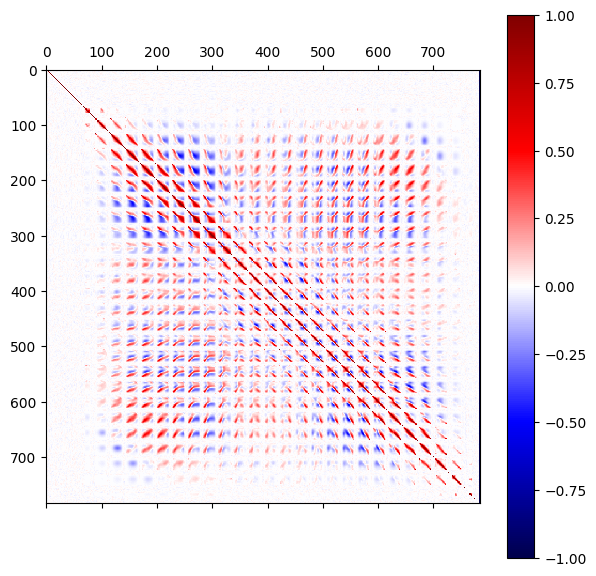

In [11]:
plt.figure(figsize = (7, 7))
plt.matshow(corr_dig, cmap = 'seismic', fignum = 1)
plt.colorbar()
plt.show()

Histograma de determinado *pixel*, condicionado em um dígito específico:

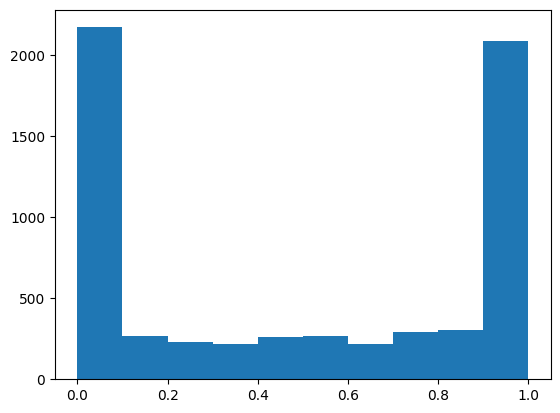

In [21]:
dig = 5
pixel = 350
plt.hist(X[y == str(dig)]['pixel' + str(pixel)])
plt.show()

Na linguagem do problema apresentados temos que:

- Atributos: São representados pelos pixels das imagens. Cada imagem possui 28x28 pixels, o que nos dá 784 atributos por imagem.

- Conjunto de Rótulos (Classe): São os dígitos (0 até 9).

- VAs aleatórias: São os dígitos observados correspondentes à imagem.

Classificador de Bayes Ingênuo - Os pixels em uma imagem de dígito não são independentes. Por exemplo, os pixels que formam uma linha ou curva em um dígito específico estão correlacionados. No projeto, assumimos que os pixels (atributos) são independentes. Não é tão grave nesse caso assumirmos isso, pois cada pixel será modelado por variáveis aleatórias que terão parâmetros diferentes, portanto serão independentes mas não identicamente distribuídas, ou seja, cada pixel não terá a mesma probabilidade de ocorrência. A distribuição de probabilidade e os parâmetros são desconhecidos, portanto precisam ser estimados.

Classificador de Bayes Ingênuo Gaussiano - Se tratando de uma VA contínua, vamos assumir que ela segue uma distribuição Normal (Gaussiana), com alguma média e com alguma variância, que serão específicas para cada pixel, diferentes de dígito para dígito, e que serão estimadas a partir dos dados disponíveis (o dígito em questão e o valor médio de cada pixel no dígito em questão).

Classificador de Bayes Ingênuo Bernoulli - Quando temos uma VA discreta, vamos assumir que cada pixel, observado em cada rótulo, seguirá uma distribuição de Bernoulli, assumindo valores 0 ou 1, que dependerão do atributo e da classe. Os parâmetros também serão estimados a partir dos dados.

Calculando a verossimilhança (prob dos dados, dado um modelo) e ponderando-a pela probabilidade a priori de termos os dígitos de 0 à 9, achamos a probabilidade daquela imagem ser de determinado dígito.

Observando a matriz de correlação dos pixels, se seguirmos a hipótese de independencia, deveríamos ter apenas uma matriz diagonal, ou seja, só deveríamos ter correlação entre um pixel e si mesmo, mas não é isso que acontece. O que é já esperado, pois ao usar a hipótese de Bayes ingênuo assumimos algo de forma errada, mas que será útil nesse caso.

Já ao observarmos o histograma apresentado, podemos perceber que a distribuição dos valores obtidos se aproxima mais de uma Bernoulli, sendo assim, podemos presumir que essa hipótese (de Bernoulli) faz mais sentido para nós, nesse problema.

Com isso, podemos concluir que, as hipóteses dos Classificadores de Bayes Ingênuo não refletem exatamente o que observamos na realidade, mas que nesse problema, podemos usá-las pois serão eficazes.

####Para analisarmos se os outros dígitos também seguem uma distribuição mais próxima da de Bernoulli, assim como ocorre com o dígito 5, decidimos criar histogramas para ver como os pixels se distribuem dentro de cada dígito.

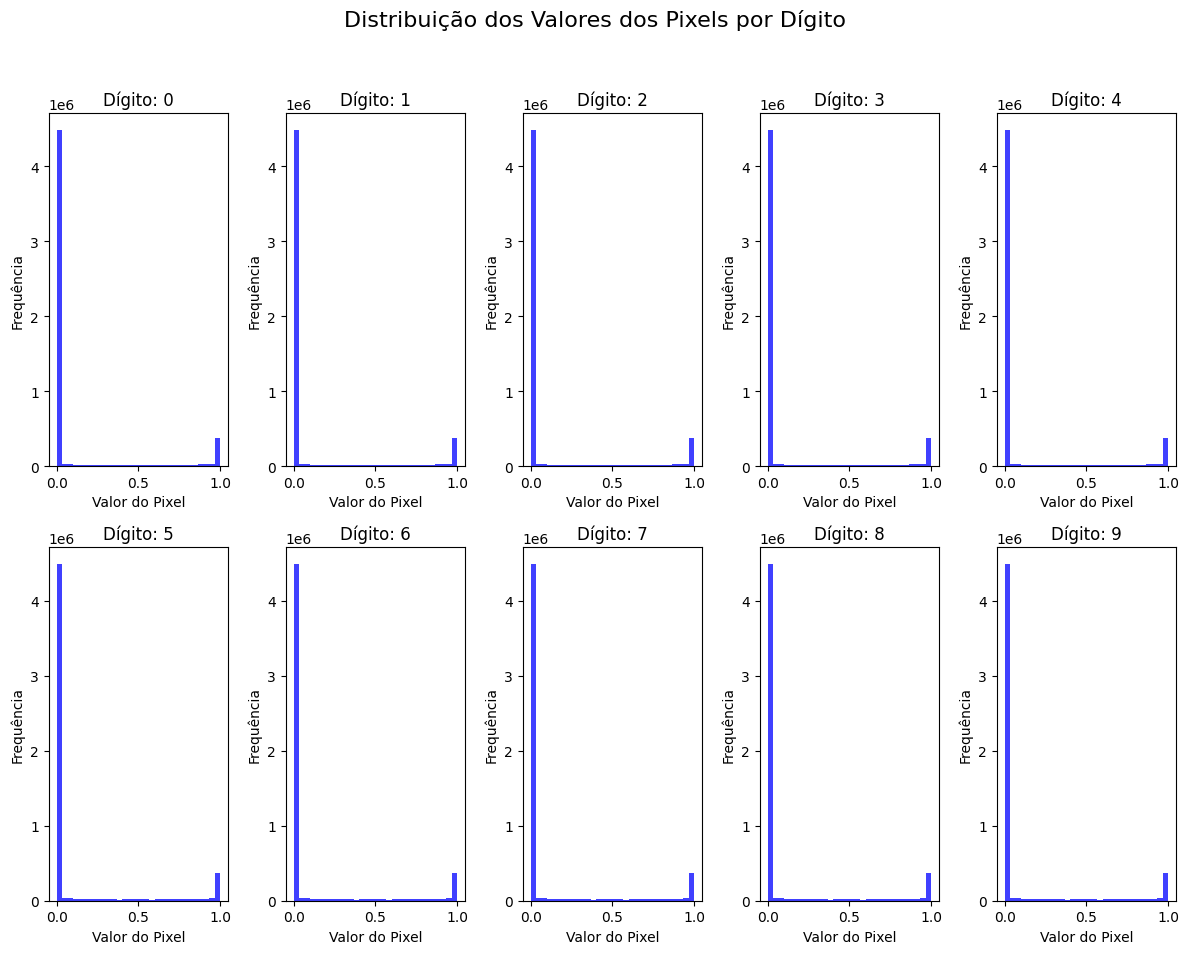

In [41]:
# Cria um histograma da distribuição dos valores dos pixels dentro de cada dígito
plt.figure(figsize=(12, 10))
for digito in range(10):
    plt.subplot(2, 5, digito + 1)
    pixel_values = X[y == str(digit)].values.flatten()
    plt.hist(pixel_values, bins=30, alpha=0.75, color='blue')
    plt.title(f'Dígito: {digito}')
    plt.xlabel('Valor do Pixel')
    plt.ylabel('Frequência')

plt.suptitle('Distribuição dos Valores dos Pixels por Dígito', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Após realizarmos este passo, chegamos à conclusão de que a análise exploratória apoia a utilização do Classificador de Bayes Ingênuo Bernoulli, devido ao comportamento dos resultados dos histogramas, que mostram uma distribuição mais próxima de uma binária.

## Classificando a base

Uma prática em aprendizagem de máquina é dividir nossa base de dados em duas partes: um *conjunto de treinamento* e um *conjunto de teste*. O primeiro será usado para estimarmos os parâmetros que o classificador precisará, e o segundo será usado para medir a sua performance. O `scikit-learn` tem ferramentas que fazem essa separação de modo automático. Abaixo, deixamos 60.000 observações para treinamento e 10.000 para teste. Para garantir igual representatividade das classes em ambos os conjuntos fazemos uma *amostragem estratificada*, através do parâmetro `stratify = y`.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 10000, shuffle = True, stratify = y)

**QUESTÃO 2:** As classes que vamos usar para fazer o nosso procedimento são as `GaussianNB` e `BernoulliNB`, localizadas dentro do módulo `naive_bayes`. A documentação do `scikit-learn` é bastante informativa, e particularmente me ajuda bastante a entender os algoritmos lá implementados. Portanto, leiam a documentação referente ao `GaussianNB` (https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) e ao `BernoulliNB` (https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html), e as página direcionadas através do *link* "User Guide", onde encontram-se as formulações matemática por trás dos método em questão. Após essa leitura, façam uma comparação do que lá é dito com o que foi apresentado acima sobre o método de classificação proposto, elencando pontos onde há semelhanças e divergências. Em particular, descreva o que os métodos `fit`, `predict` e `predict_proba` fazem.

Os métodos GaussianNB e BernoulliNB são métodos de classificação baseados na aplicação do teorema de Bayes, assumindo ingênuamente (naive) uma independência condicional entre os atributos, dado o dígito representado. Ou seja, são métodos de classificação, que vão "aprender" o comportamento dos pixels das imagens de acordo com as classes (dígitos), para estimar o dígito apresentado na imagem, estimando a média e a variância dos pixels em cada classe (dígito).

Entretanto, os métodos "aprendem" tais comportamentos de forma diferente, de acordo com a distribuição dos dados (de forma contínua - Gaussiana ou Distribuição Normal - ou discreta - Bernoulli).

O GaussianNB assume que os dados possuem uma distribuição de probabilidade normal (ou Gaussiana), já para o BernoulliNB os dados precisam assumir valores binários. Caso a base de dados não apresente tal distribuição, é possível "binarizá-los".

A fórmula utilizada no GaussianNB é a seguinte:
$$P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)$$

onde $\sigma_y$ (variância) e $\mu_y$ (média) são estimados usando máxima verossimilhança.
Como conhecemos durante a disciplina, é a fórmula da função de densidade de probabilidade da distribuição gaussiana (ou normal), sem utilizar a normalização.

Já a fórmula utilizada no BernoulliNB é a seguinte:
$$P(x_i \mid y) = P(x_i = 1 \mid y) x_i + (1 - P(x_i = 1 \mid y)) (1 - x_i)$$


As maneiras de se chegar ao resultado são mais simplificadas que as propostas no projeto, entretanto, como descrito na própria documentação, funcionam bem para muitas aplicações na vida real.

Métodos:


- Fit - Recebe como parâmetro X e y.Pode também receber o sample_wheight como parâmetro, que correspondem a pesos das amostras. Este método é usado para treinar o modelo. Ele ajusta os parâmetros do modelo com base nos dados de treinamento "X" e nas classes "y". Para o GaussianNB, os parâmetros que serão ajustados com base em "X" e "y" são a média e a variância, supondo que os dados de cada classe seguem uma distribuição Gaussiana (Normal). Já para BernoulliNB, os parâmetros também serão estimados, mas esse modelo assume que cada atributo é uma variável binária, sendo assim, indicará a ausência ou presença de um atributo específico.

- Predict - Recebe um array X como parâmetro. Esse método pode ser usado para realizar uma classificação, ou seja, ele irá prever a classe alvo para novos dados de "X", como base na probabilidade posterior máxima. Geralmente é usado após o treinamento (Método Fit).

- Predict_proba - Recebe como parâmetro um array X. Ao aplicar este método, ele retornará a probabilidade estimada de cada classe para as amostras em "X". Cada probabilidade é calculada com base no  modelo treinado, no caso da GaussianNB, a distribuição Gaussiana, e no caso da BernoulliNB, a distribuição de Bernoulli.

Portanto, podemos observar que ambos os classificadores implementam as funções "fit", "predict" e "predict_proba". Observamos também que eles diferem quando se trata da suposição da distribuição dos dados, sendo a GaussianNB assumindo uma distribuição Normal, e estimando médias e variâncias para cada atributo e classe. Já a de BernoulliNB assume uma distribuição binária, estimando probabilidades de ocorrência para atributos.

**QUESTÃO 3:** Agora é a sua vez de trabalhar sobre a base de dados que apresentamos! Use o `GaussianNB` e o `BernoulliNB` para treinar os modelos de Bayes ingênuo gaussiano e Bernoulli nos conjuntos `X_train` e `y_train`, e prever os resultados no conjunto `X_test`. Agora, com um exemplo concreto em mãos, revisite o que os métodos  `predict` e `predict_proba` fazem. Uma dica é olhar os exemplos na documentação do `scikit-learn`.

In [15]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

# Treinar GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Treinar BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

# Fazer previsões com GaussianNB
y_pred_gnb = gnb.predict(X_test)
y_proba_gnb = gnb.predict_proba(X_test)

# Fazer previsões com BernoulliNB
y_pred_bnb = bnb.predict(X_test)
y_proba_bnb = bnb.predict_proba(X_test)

# Exibir os resultados
print("Gaussiana:\n")
print("Predições:\n" , y_pred_gnb)
print("\nProbabilidades:\n", y_proba_gnb)
print("\n\nBernoulli:\n")
print("Predições:\n" , y_pred_bnb)
print("\nProbabilidades:\n", y_proba_bnb)

Gaussiana:

Predições:
 ['6' '0' '9' ... '6' '8' '0']

Probabilidades:
 [[2.03958147e-214 0.00000000e+000 1.35001686e-247 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [1.00000000e+000 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [1.67048614e-289 2.56879201e-054 0.00000000e+000 ... 9.82386907e-236
  3.01013735e-047 1.00000000e+000]
 ...
 [2.05301634e-304 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [1.98535432e-091 1.70745297e-267 8.65407638e-263 ... 0.00000000e+000
  9.98764999e-001 1.23500101e-003]
 [1.00000000e+000 0.00000000e+000 4.91347881e-274 ... 0.00000000e+000
  5.79445436e-052 4.44408126e-065]]


Bernoulli:

Predições:
 ['2' '0' '8' ... '6' '3' '0']

Probabilidades:
 [[1.18724381e-044 1.62979454e-131 1.00000000e+000 ... 1.47588327e-042
  2.87766185e-030 4.61000523e-035]
 [1.00000000e+000 3.80301893e-151 5.73682078e-041 ... 3.36576168e-041
  2.39849882e-062 6.08676126e-045]
 [7.6567

Ambos os métodos "Predict" e "Predict_proba" foram usados no exemplo acima para realizar previsões e calcular as probabilidades para os dados de teste. O primeiro método aplicado (Predict) fez previsões de rótulos de classe para o conjunto de teste, retornando a classe mais provável para cada amostra. Já o segundo (Predict_proba), retornou as probabilidades associadas a cada classe para cada uma das amostras.

**QUESTÃO 4:** Nós temos um conjunto de dados relativamente grande, com 60.000 observações. Para ajustar um classificador de Bayes ingênuo gaussiano, quantos parâmetros nós precisamos estimar? E para o classificador de Bayes ingênuo Bernoulli? Compare esse número com o tamanho do conjunto de treinamento, e diga o que você pode esperar da qualidade de tais estimativas pontuais.

Para ajustar um classificador de Bayes ingênuo Gaussiano precisamos estimar 15.680 parâmetros. Para chegar nesse número, pegamos os 2 parâmetros da distribuição Normal de cada atributo (média e variância), as 10 classes (0 a 9), os 784 atributos (pixels), e multiplicamos. Quando estamos falando de ajustar um classificador de Bayes ingênuo de Bernoulli, temos 1 parâmetro da distribuição de Bernoulli (probabilidade de ocorrência), as mesmas 10 classes totais (0 a 9), e os mesmos 784 atributos (pixels). Multiplicando os valores citados anteriormente, concluímos que temos um total de 7.840 atributos para estimar.

Ao compararmos a quantidade de atributos que precisamos estimar com o total de observações, podemos perceber que a quantidade que precisamos estimar é muito grande no modelo Gaussiano, o que pode diminuir a qualidade do classificador. Já o modelo de Bernoulli possui metade das estimações necessárias no modelo Gaussiano, o que pode levar o modelo de Bernoulli a ter certa vantagem sobre o modelo Gaussiano.

**QUESTÃO 5:** Bom, agora nós temos um classificador e temos como prever o resultado da classificação no nosso conjunto de teste. Mas como podemos *medir* o desempenho de nosso classificador? Estude sobre a *matriz de confusão* e sobre a *acurácia* de um classificador, e disserte sobre essas duas quantidades. Relacione a quantidade retornada pelo método `score` com a acurácia que você acabou de estudar.

Recomendação:
* https://en.wikipedia.org/wiki/Confusion_matrix [A matriz de confusão aqui será referente a um problema de classificação *binário*, enquanto que estamos tratando de um problema de classificação *multiclasse*. Tome cuidado com essa diferença]
* https://en.wikipedia.org/wiki/Accuracy_and_precision

*BÔNUS:* Porque acima nós falamos somente sobre aferir a qualidade do classificador no conjunto de teste e não no de treinamento? Discuta sobre esse ponto.

In [16]:
# Avaliar a acurácia dos modelos
acuracia_gnb = gnb.score(X_test, y_test)
acuracia_bnb = bnb.score(X_test, y_test)

print(f'Acurácia do GaussianNB: {acuracia_gnb:.3f}')
print(f'Acurácia do BernoulliNB: {acuracia_bnb:.3f}')

Acurácia do GaussianNB: 0.550
Acurácia do BernoulliNB: 0.834


 - A "Matriz de confusão" nada mais é do que uma matriz que relaciona a classificação correta com a classificação feita pelo modelo, indicando se o modelo classificou o dígito de forma correta no caso desse projeto.

 - Com isso, podemos facilmente relacionar e ver a acurácia de cada modelo. Com o método "score" podemos fazer tal medição. Essa medição é calculada da seguinte forma:

 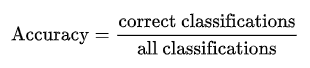

 - Com isso temos uma acurácia aproximada de 55% no modelo Gaussiano e 83% no modelo de Bernoulli.(Basta rodar os testes e predições mais de uma vez para observar a flutuação dos valores de acurácia)

 - Não parece fazer tanto sentido falarmos em acurácia no treinamento dos modelos, principalmente devido ao fato de o aprendizado nesse projeto ser supervisionado, ou seja, o modelo recebe a classificação de cada imagem, e utiliza tal classificação para encontrar um padrão no comportamento dos valores dos pixel das imagens. Com isso, não seria possível medir a acurácia real de tais modelos, apenas estimá-las.

 - Além disso, utilizamos o método "fit", para estimar as variáveis necessárias para a predição a ser feita pelos modelos, ou seja, para treinamento dos modelos.



**QUESTÃO 6:** Use o código dado abaixo para exibir as matrizes de confusão, bem como uma representação gráfica mais amigável delas. Analise os erros cometidos pelos classificadores e tente justificá-los, com base nas hipóteses dos classificadores e da natureza da base de dados. Calcule também a acurácia do classificador estimado. À luz dessas duas informações, extraia alguma conclusão sobre o classificador ser "bom" ou "ruim", em seu ponto de vista. Note que sua ponderação deve levar em consideração também o custo computacional dos classificadores! Use como um "pior classificador possível" aquele que atribui uma observação a qualquer um dos dígitos de 0 até 9, aleatoriamente.

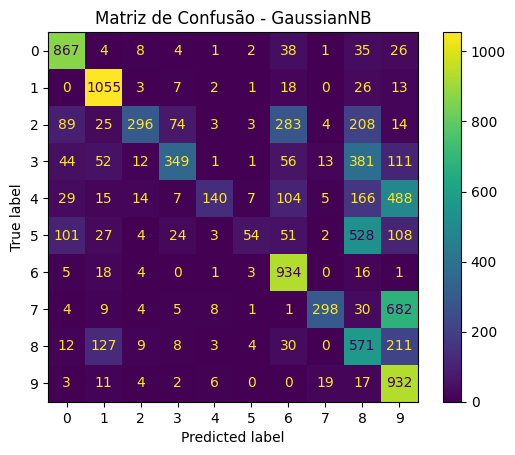

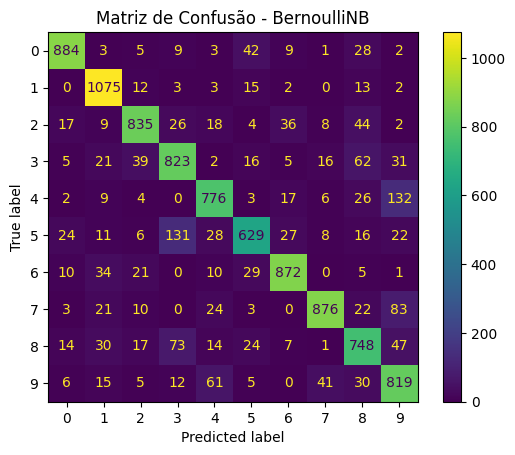

In [17]:
# A variável y_test_pred abaixo deverá ser a previsão do seu classificador no conjunto de teste, ou seja, em X_test.

# Exibir Matriz de Confusão de GaussianNB
labels = y.cat.categories
cm = confusion_matrix(y_test, y_pred_gnb, labels=labels)
disp = ConfusionMatrixDisplay(cm, display_labels = labels)
disp.plot()
plt.title('Matriz de Confusão - GaussianNB')
plt.show()

# Exibir Matriz de Confusão de BernoulliNB
labels = y.cat.categories
cm = confusion_matrix(y_test, y_pred_bnb, labels=labels)
disp = ConfusionMatrixDisplay(cm, display_labels = labels)
disp.plot()
plt.title('Matriz de Confusão - BernoulliNB')
plt.show()

Os classificadores GaussianNB e BernoulliNB foram avaliados usando a base de dados MNIST, que possui 70.000 imagens de tamanho 28x28. Após montarmos a Matriz de Confusão de cada classificador, notamos erros comuns de se esperar de cada um deles. O GaussianNB, por exemplo, assume que os pixels são independentes, por isso ele é mais provável de confundir números que possuem traços parecidos. Assim como mostra em sua matriz, muitos números "3" foram previstos como se fossem um "8", e muitos números "4" foram previstos como "7", dentre outros. O de BernoulliNB, por assumir uma distribuição binária, pode acabar perdendo alguns traços (alguns pixels) que são importantes para a previsão correta do número real. Ao compararmos as duas matrizes, notamos que na de Bernoulli, os números se concentram mais na diagonal principal, o que indica que há mais correspondências corretas, do que se compararmos com a diagonal principal da matriz do GaussianNB. Tal fato comprova o resultado da acurácia, dado na questão 5, na qual o GaussianNB tem acurácia de 0,559 e o de BernoulliNB possui uma de 0,828. No nosso ponto de vista, ambos os classificadores apresentam suas limitações e não possuem acurácias tão altas, então para esse tipo de problema eles não seriam tão bons. Mesmo assim, o de Bernoulli apresentou um melhor desempenho reconhecendo dígitos do que o classificador GaussianNB.

**QUESTÃO 7:** Finalmente, após ter realizado todos esses experimentos, descreva quais hipóteses poderiam ser aprimoradas em nosso classificador, para que ele seja mais condizente com a base de dados e, portanto, possivelmente apresente um resultado melhor.

Note que não há como atingir 100% de acurácia neste problema. Veja abaixo algumas instâncias especialmente complicadas, e possivelmente rotuladas erroneamente:

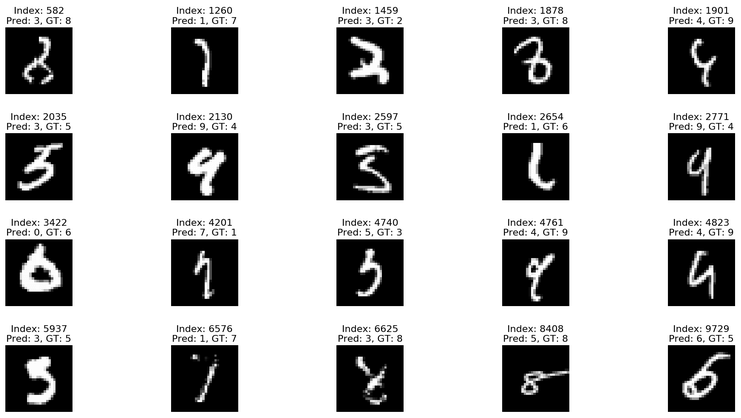

- O primeiro ponto a ser abordado, é a questão das imagens ruidosas na base de dados, que é um dos fatores que influencia na acurácia dos modelos.

- Outro ponto a ser abordado, é a questão de assumirmos (para efeito de simplificação ao tentar solucionar o problema) a independência dos valores dos pixels, que como vimos, até com a análise exploratória através da matriz de correlação, que existe certa dependência entre os valores dos pixels. Portanto, para uma melhor acurácia, poderia ser melhor utilizar outro modelo de predição, entretanto, é necessário levar em conta a aplicação e funcionalidade computacional de um modelo que utilize essa dependência entre os pixels como um parâmetro para a predição.

- Podemos ainda citar a falta de padrão ao analisarmos números manuscritos, que além de serem ruidosos, são escritos por pessoas diferentes, com caligrafias diferentes, o que dificulta o processo de encontrar um "padrão de escrita"

- Outro importante ponto é a utilização de uma base de dados ainda maior, que possibilitaria um melhor treinamento, e consequentemente um melhor resultado.
